In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


In [2]:
# import findspark
# findspark.init() 
# you can also pass spark home path to init() method like below
# findspark.init("/path/to/spark")


In [3]:
# import pyspark

In [4]:
# from pyspark import SparkConf,SparkContext 
# from pyspark.sql import SparkSession,SQLContext
# from sklearn.pipeline import Pipeline

In [5]:
# sc=SparkContext()

In [6]:
# sqlContext = SQLContext(sc)

In [7]:
# spark = SparkSession.builder.master("local[1]")\
#                     .appName('lin_regress')\
#                     .getOrCreate()


In [8]:
# df = spark.read.option("header",True).option('inferSchema',True).csv("C:/Users/ADITYA PC/Downloads/train.csv (1)/train.csv")
# df_pd =df.toPandas()
# return df_pd

In [9]:
# # Read the CSV file into a DataFrame
# df = spark.read.csv(r"C:\Users\ADITYA PC\Downloads\train.csv (1)\train.csv", header=True, inferSchema=True)

# # Show the DataFrame
# df.show()

In [10]:
# for chunk in df :
#     deatils= chunk[['key','fare_amount','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitudedropoff_latitude 	passenger_coun]]
#     break

In [11]:
#read training and testing data
df=pd.read_csv(r"C:\Users\ADITYA PC\Downloads\train.csv (1)\train.csv",nrows= 2000000)

In [12]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [13]:
df.shape

(2000000, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 122.1+ MB


In [15]:
df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
dtype: int64

##### Null values are very small hences Droping the null values.

In [16]:
df = df.dropna() 

In [17]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [18]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06
mean,1.134768e+01,-7.252324e+01,3.992965e+01,-7.252395e+01,3.992808e+01,1.684125e+00
std,9.852609e+00,1.286798e+01,7.983330e+00,1.277497e+01,1.032382e+01,1.314979e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [19]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [20]:
df.duplicated().sum()

0

##### Droping key colunm it's similar to pickup_datetime

In [21]:
df = df.drop('key',axis=1)

In [22]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


##### converting pickup_datetime column to date time 

In [23]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999986 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column             Dtype              
---  ------             -----              
 0   fare_amount        float64            
 1   pickup_datetime    datetime64[ns, UTC]
 2   pickup_longitude   float64            
 3   pickup_latitude    float64            
 4   dropoff_longitude  float64            
 5   dropoff_latitude   float64            
 6   passenger_count    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 122.1 MB


##### Separating  pickup_datetime columns into multiple columns according to hour, day , month ,year

In [25]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
                      day = df.pickup_datetime.dt.day,
                      month = df.pickup_datetime.dt.month,
                      year = df.pickup_datetime.dt.year,
                      dayofweek = df.pickup_datetime.dt.dayofweek)

In [26]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


In [27]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06,1.999986e+06
mean,1.134768e+01,-7.252324e+01,3.992965e+01,-7.252395e+01,3.992808e+01,1.684125e+00,1.350827e+01,1.571031e+01,6.267687e+00,2.011740e+03,3.041727e+00
std,9.852609e+00,1.286798e+01,7.983330e+00,1.277497e+01,1.032382e+01,1.314979e+00,6.515764e+00,8.681900e+00,3.436747e+00,1.860588e+00,1.949844e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.009000e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00,9.000000e+00,8.000000e+00,3.000000e+00,2.010000e+03,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00,1.400000e+01,1.600000e+01,6.000000e+00,2.012000e+03,3.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00,1.900000e+01,2.300000e+01,9.000000e+00,2.013000e+03,5.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02,2.300000e+01,3.100000e+01,1.200000e+01,2.015000e+03,6.000000e+00


##### Droping pickup_datetime no use

In [28]:
df.drop('pickup_datetime',axis=1,inplace= True)

In [29]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999986 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float64
 1   pickup_longitude   float64
 2   pickup_latitude    float64
 3   dropoff_longitude  float64
 4   dropoff_latitude   float64
 5   passenger_count    int64  
 6   hour               int64  
 7   day                int64  
 8   month              int64  
 9   year               int64  
 10  dayofweek          int64  
dtypes: float64(5), int64(6)
memory usage: 183.1 MB


## Feature engineering

### Dealing with outliers

#### pickup_longitude

In [31]:
df.pickup_longitude.value_counts().index.sort_values(ascending=True)

Float64Index([-3377.680935,  -3007.20545, -2986.242495, -2973.644717,
              -2647.971338, -2320.853032, -2256.421232, -1659.514697,
              -1649.643088, -1452.988333,
              ...
                 40.838225,    40.850357,    351.05252,   1721.17266,
                2140.60116,  2417.411523,  2434.238557,  2522.271325,
               2814.475637,   2856.44156],
             dtype='float64', length=135198)

In [32]:
# Define the range of acceptable values
median = df['pickup_longitude'].median()
std = df['pickup_longitude'].std()
low = median - 3*std
high = median + 3*std

# Filter out values outside the range
df1 = df[(df['pickup_longitude'] >= low) & (df['pickup_longitude'] <= high)]

### We define the range of acceptable values as three standard deviations away from the median, and store the lower and upper bounds in the variables low and high.
### we filter out any values in the DataFrame that fall outside the acceptable range by using the >= and <= operators to create a boolean mask that selects only the rows with x values between low and high.

In [33]:
df1.shape

(1960938, 11)

In [34]:
df1.pickup_longitude.value_counts().index.sort_values(ascending=True)

Float64Index([       -108.202955,         -94.366665,         -93.916667,
                      -90.433333,         -90.239125,         -89.439785,
                      -88.959517,         -84.016667,          -83.91033,
                      -82.616171,
              ...
                      -66.238246,         -66.188354, -65.70152282714844,
                      -62.830506,          -60.88002,         -56.382934,
                       -54.06669,         -51.694129,         -49.333294,
                      -42.599058],
             dtype='float64', length=133921)

In [35]:
# def outliers_remove(x,df1):
# # Define the range of acceptable values
#     median = df1[x].median()
#     std = df1[x].std()
#     low = median - 3*std
#     high = median + 3*std

#     # Filter out values outside the range
#     df1 = df1[(df1[x] >= low) & (df1[x] <= high)]

# above function is  not working properly

#### pickup_latitude

In [36]:
df1.pickup_latitude.value_counts().index.sort_values(ascending=True)

Float64Index([ -19.721222,         0.0,    0.006172,    0.015702,    0.016088,
                 0.016415,    0.033332,    0.066667,    0.066985,    0.069752,
              ...
               401.083332,  404.233332,  404.966667,  405.133332,      405.15,
                   405.35,  405.416667,  405.583332,  424.083332, 1963.515858],
             dtype='float64', length=169426)

In [37]:
df1.pickup_latitude.value_counts()

41.366138    677
40.774057    156
40.774102    151
40.774117    132
40.774072    132
            ... 
40.688575      1
40.825308      1
40.708206      1
40.830204      1
40.666735      1
Name: pickup_latitude, Length: 169426, dtype: int64

In [38]:
# Define the range of acceptable values
median = df1['pickup_latitude'].median()
std = df1['pickup_latitude'].std()
low = median - 3*std
high = median + 3*std

# Filter out values outside the range
df1 = df1[(df1['pickup_latitude'] >= low) & (df1['pickup_latitude'] <= high)]

In [39]:
df1.shape

(1960849, 11)

In [40]:
df1.pickup_latitude.value_counts().index.sort_values(ascending=True)

Float64Index([         36.103794,          36.433862,           36.52753,
                       36.709352,          37.239032,           37.41688,
                       37.419853,          37.954097,          38.064163,
                       38.270887,
              ...
                       43.098708,          43.183332,          43.213962,
                       43.746249, 43.945964813232415,          44.081344,
                       44.261419,          45.035255,          45.043185,
                       45.341914],
             dtype='float64', length=169349)

#### dropoff_longitude

In [41]:
df1.dropoff_longitude.value_counts().index.sort_values(ascending=True)

Float64Index([-2125.745368, -1329.621332, -1183.275658,       -782.1,
                -773.94104,  -740.066667,       -740.0,      -736.55,
                    -736.5,  -736.416665,
              ...
                 -0.016667,    -0.014975,    -0.012972,     -0.00975,
                 -0.008333,    -0.007412,       -0.005,          0.0,
                  0.000495,    45.581619],
             dtype='float64', length=165427)

In [42]:
# Define the range of acceptable values
median = df1['dropoff_longitude'].median()
std = df1['dropoff_longitude'].std()
low = median - 3*std
high = median + 3*std

# Filter out values outside the range
df1 = df1[(df1['dropoff_longitude'] >= low) & (df1['dropoff_longitude'] <= high)]

In [43]:
df1.shape

(1958988, 11)

In [44]:
df1.dropoff_longitude.value_counts().index.sort_values(ascending=True)

Float64Index([-83.730979, -82.641761,  -80.80797, -79.581713, -79.486418,
              -79.029477, -78.957083, -78.725186, -78.669423, -78.659447,
              ...
              -70.183332,   -70.0505, -70.002265, -69.817934, -69.642325,
              -69.066667, -68.134699, -66.188354, -65.869243, -64.677443],
             dtype='float64', length=165290)

#### dropoff_latitude

In [45]:
df1.dropoff_latitude.value_counts().index.sort_values(ascending=True)

Float64Index([-2518.94701,         0.0,    0.000262,    0.000672,    0.005337,
                  0.00898,    0.010532,    0.014042,     0.04718,    0.066667,
              ...
                46.166667,    49.25565,   53.016667,   55.783332,  404.133332,
               404.466667,  404.616667,  404.716667,      405.65,  433.483332],
             dtype='float64', length=209576)

In [46]:
# Define the range of acceptable values
median = df1['dropoff_latitude'].median()
std = df1['dropoff_latitude'].std()
low = median - 3*std
high = median + 3*std

# Filter out values outside the range
df1 = df1[(df1['dropoff_latitude'] >= low) & (df1['dropoff_latitude'] <= high)]

In [47]:
df1.shape

(1958909, 11)

In [48]:
df1.dropoff_latitude.value_counts().index.sort_values(ascending=True)

Float64Index([35.561551, 35.828013, 37.237828, 37.346533, 37.399003, 37.631228,
              37.899517, 38.016169, 38.275407, 38.344065,
              ...
              43.795713,     43.85,  44.07763,  44.41668,      44.6, 44.671432,
              45.035269, 45.043192, 45.341914, 46.166667],
             dtype='float64', length=209509)

#### passenger_count

In [49]:
df1.passenger_count.value_counts().index.sort_values(ascending=True)

Int64Index([0, 1, 2, 3, 4, 5, 6, 9], dtype='int64')

In [50]:
df1.passenger_count.value_counts()

1    1354314
2     290257
5     138489
3      85935
4      41843
6      41117
0       6953
9          1
Name: passenger_count, dtype: int64

In [51]:
# Define the range of acceptable values
median = df1['passenger_count'].median()
std = df1['passenger_count'].std()
low = median - 3*std
high = median + 3*std

# Filter out values outside the range
df1 = df1[(df1['passenger_count'] >= low) & (df1['passenger_count'] <= high)]

In [52]:
df1.shape

(1779302, 11)

In [53]:
df1.passenger_count.value_counts().index.sort_values(ascending=True)

Int64Index([0, 1, 2, 3, 4], dtype='int64')

#### fare_amount

In [54]:
df1['fare_amount'].value_counts().index.sort_values(ascending=True)

Float64Index([ -62.0,  -52.0,  -45.0,  -44.9, -29.87,  -20.9,  -18.1,  -10.1,
                -6.5,   -6.1,
              ...
               315.0,  325.0, 347.54, 386.08,  400.0,  430.0,  450.0,  488.0,
               495.0,  500.0],
             dtype='float64', length=2700)

#### fair should not be in negative numbers, therefore making them positive

In [55]:
df1['fare_amount']=df1['fare_amount'].abs()

In [56]:
df1['fare_amount'].value_counts().index.sort_values(ascending=True)

Float64Index([   0.0,   0.01,   0.08,    2.0,    2.5,   2.51,   2.53,   2.54,
                2.55,    2.6,
              ...
               315.0,  325.0, 347.54, 386.08,  400.0,  430.0,  450.0,  488.0,
               495.0,  500.0],
             dtype='float64', length=2681)

In [57]:
df1['fare_amount'].value_counts()

6.50      86679
4.50      73127
8.50      66588
5.30      52387
5.70      52058
          ...  
101.33        1
19.14         1
14.91         1
95.95         1
85.54         1
Name: fare_amount, Length: 2681, dtype: int64

In [58]:
# Define the range of acceptable values
median = df1['fare_amount'].median()
std = df1['fare_amount'].std()
low = median - 3*std
high = median + 3*std

# Filter out values outside the range
df1 = df1[(df1['fare_amount'] >= low) & (df1['fare_amount'] <= high)]

In [59]:
df1['fare_amount'].value_counts().index.sort_values(ascending=True)

Float64Index([  0.0,  0.01,  0.08,   2.0,   2.5,  2.51,  2.53,  2.54,  2.55,
                2.6,
              ...
               37.4, 37.44, 37.45, 37.47,  37.5, 37.53, 37.54, 37.55,  37.6,
               37.7],
             dtype='float64', length=948)

In [60]:
df1.shape

(1724485, 11)

In [61]:
df1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


#### The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

In [62]:
from haversine import haversine, Unit

#### Creating a New fortravel distance in km using latitude and longitude values using haversine

In [63]:
df1['travel_dist_km']=df1.apply(lambda row: haversine((row["pickup_latitude"],row["pickup_longitude"]),(row["dropoff_latitude"],row["dropoff_longitude"]),unit=Unit.KILOMETERS),axis=1)

In [64]:
df1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,travel_dist_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030765
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450145
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389527
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799274
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999160


In [65]:
df1.tail()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,travel_dist_km
1999995,4.0,-73.950787,40.770836,-73.951043,40.774543,1,13,17,11,2014,0,0.412763
1999996,7.0,-73.983035,40.748276,-73.974725,40.741978,1,17,25,2,2013,0,0.990212
1999997,10.5,-74.003482,40.743577,-73.976758,40.765265,1,22,12,7,2013,4,3.298919
1999998,10.9,-73.971819,40.797243,-73.985921,40.752459,3,9,17,1,2009,5,5.119385
1999999,12.9,-73.955140,40.779382,-73.914775,40.820602,2,15,16,1,2010,5,5.705472


In [66]:
df1.shape

(1724485, 12)

#### Travel_dist_km

In [86]:
df1['travel_dist_km'].value_counts().index.sort_values(ascending=True)

Float64Index([                  0.0, 8.417978431885333e-05,
              8.418829704048982e-05,  8.41969301036964e-05,
              8.421156482396615e-05, 8.421773924067641e-05,
              8.422506970333336e-05, 8.423395634169684e-05,
              8.423769844483962e-05, 8.424039778507023e-05,
              ...
                  594.5128860414112,     604.6718800443194,
                  654.1797135714223,     682.1128710915606,
                  739.9132996702516,     842.7921949643898,
                  1385.701073441256,     1674.481990628003,
                  1682.757082064297,     2766.630701604558],
             dtype='float64', length=1706638)

In [87]:
df1['travel_dist_km'].value_counts()

0.000000    17709
0.000334       20
0.000222       18
0.000111       14
0.000424        9
            ...  
9.467937        1
5.071000        1
0.908217        1
2.141730        1
5.705472        1
Name: travel_dist_km, Length: 1706638, dtype: int64

In [89]:
# Define the range of acceptable values
median = df1['travel_dist_km'].median()
std = df1['travel_dist_km'].std()
low = median - 3*std
high = median + 3*std

# Filter out values outside the range
df1 = df1[(df1['travel_dist_km'] >= low) & (df1['travel_dist_km'] <= high)]

In [90]:
df1.shape

(1721334, 8)

In [91]:
df1['travel_dist_km'].value_counts().index.sort_values(ascending=True)

Float64Index([                  0.0, 8.417978431885333e-05,
              8.418829704048982e-05,  8.41969301036964e-05,
              8.421156482396615e-05, 8.421773924067641e-05,
              8.422506970333336e-05, 8.423395634169684e-05,
              8.423769844483962e-05, 8.424039778507023e-05,
              ...
                 16.654578209096314,    16.655411740232392,
                 16.655808540482507,     16.65582002235556,
                     16.65593471003,     16.65594985232599,
                 16.655955444173845,    16.656273679322567,
                 16.656288012276413,    16.656793107997103],
             dtype='float64', length=1703487)

In [67]:
# df1[df1.travel_dist_km==0]

#### Dropping pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude No use 

In [68]:
df1.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [69]:
df1.head()

,fare_amount,passenger_count,hour,day,month,year,dayofweek,travel_dist_km
0,4.5,1,17,15,6,2009,0,1.030765
1,16.9,1,16,5,1,2010,1,8.450145
2,5.7,2,0,18,8,2011,3,1.389527
3,7.7,1,4,21,4,2012,5,2.799274
4,5.3,1,7,9,3,2010,1,1.999160



# EDA 

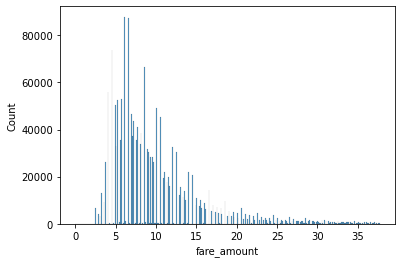

Minimum fare: 0.0
Maximum fare: 37.7
Average fare price : 10.037662925452029


In [70]:
#Distribtuion of fair prices 
sns.histplot(df1.fare_amount)
plt.show()
print('Minimum fare:', df1.fare_amount.min())
print('Maximum fare:', df1.fare_amount.max())
print('Average fare price :', df1.fare_amount.mean())

#### From the plot above, we can infer that fair prices are right-skewed. 

Minimum passengers: 0
Maximum passengers: 4
frequent numbers of passengers :  1


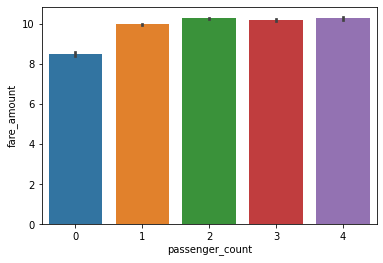

In [71]:
# EDA for passenger_count
print('Minimum passengers:', df1.passenger_count.min())
print('Maximum passengers:', df1.passenger_count.max())
print('frequent numbers of passengers : ', df1.passenger_count.mode()[0])

sns.barplot(x='passenger_count', y='fare_amount', data=df1)
plt.show()

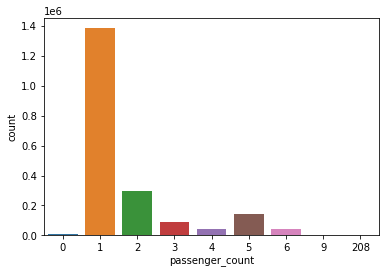

In [72]:
sns.countplot(df.passenger_count)
plt.show()

In [73]:
df1.groupby('passenger_count')['fare_amount'].median()

passenger_count
0    7.3
1    8.1
2    8.5
3    8.5
4    8.5
Name: fare_amount, dtype: float64

Minimum hour: 0
Maximum hour: 23
Most hour on which taxi is take: 19


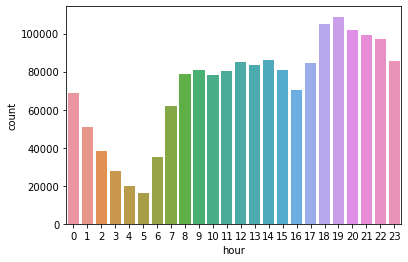

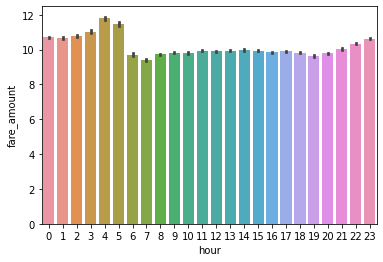

In [74]:
# EDA for hour
print('Minimum hour:', df1.hour.min())
print('Maximum hour:', df1.hour.max())
print('Most hour on which taxi is take:', df1.hour.mode()[0])
sns.countplot(df1.hour)
plt.show()
sns.barplot(x='hour', y='fare_amount', data=df1)
plt.show()

#### From countplot we get information that after '5 pm' maximum numbers are taxis are taken for commute. also commute by taxi less after '12 Am' till '5 Am' after  

Minimum day: 1
Maximum day: 31
Day for which max numbers of taxi travel occur in month : 13


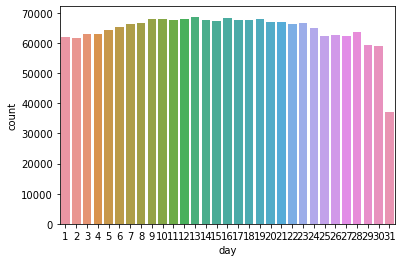

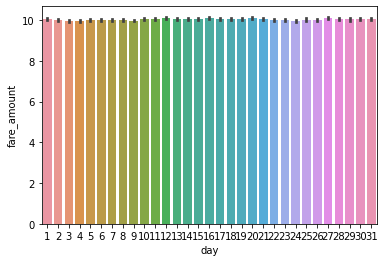

In [75]:
# EDA for day
print('Minimum day:', df1.day.min())
print('Maximum day:', df1.day.max())
print('Day for which max numbers of taxi travel occur in month :', df1.day.mode()[0])
sns.countplot(df.day)
plt.show()
sns.barplot(x='day', y='fare_amount', data=df1)
plt.show()

#### from count plot we got know that taxi commute is less at end of the months

Minimum month: 1
Maximum month: 12
month for which max numbers of taxi travel occur in year: 3


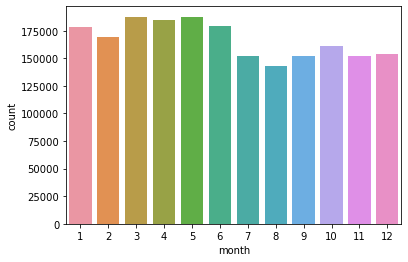

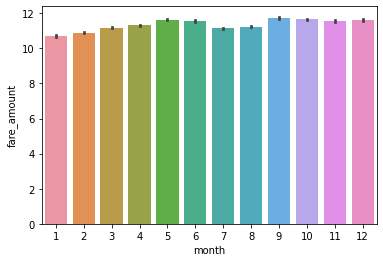

In [76]:
# EDA for month
print('Minimum month:', df1.month.min())
print('Maximum month:', df1.month.max())
print('month for which max numbers of taxi travel occur in year:', df1.month.mode()[0])
sns.countplot(df.month)
plt.show()
sns.barplot(x='month', y='fare_amount', data=df)
plt.show()

#### From the count plot, we learned that in  spring (March-May) taxi commute  is max than other months on other hand  in summer (June-August) taxi commute is less

dayofweek for which max numbers of taxi travel occur in week : 4


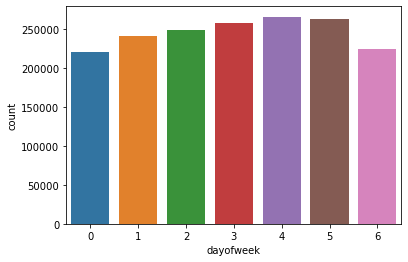

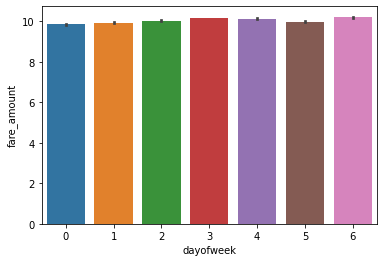

In [77]:
# EDA for month
print('dayofweek for which max numbers of taxi travel occur in week :', df1.dayofweek.mode()[0])
# EDA for dayofweek
sns.countplot(df1.dayofweek)
plt.show()
sns.barplot(x='dayofweek', y='fare_amount', data=df1)
plt.show()

#### Day six of the  week have Minimum travel 

Minimum distance: 0.0
Maximum distance: 16.656793107997103
Average Distance travel:   2.885087903770501


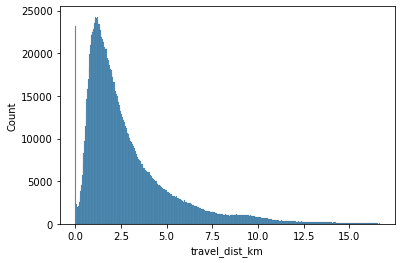

In [92]:
# EDA for travel_dist_km
print('Minimum distance:', df1.travel_dist_km.min())
print('Maximum distance:', df1.travel_dist_km.max())
print('Average Distance travel:  ',df1.travel_dist_km.mean())
sns.histplot(df1.travel_dist_km)
plt.show()

#### travel_dist_km is right right-skewed

<AxesSubplot:xlabel='year', ylabel='fare_amount'>

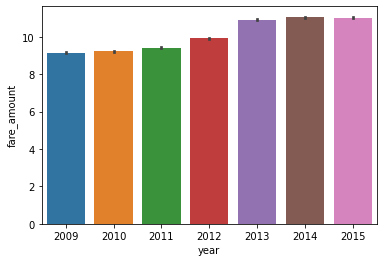

In [94]:
sns.barplot(x='year', y='fare_amount', data=df1)

#### from above graph we learn that fare price increas as the year  increas 

In [93]:
df1.head()

,fare_amount,passenger_count,hour,day,month,year,dayofweek,travel_dist_km
0,4.5,1,17,15,6,2009,0,1.030765
1,16.9,1,16,5,1,2010,1,8.450145
2,5.7,2,0,18,8,2011,3,1.389527
3,7.7,1,4,21,4,2012,5,2.799274
4,5.3,1,7,9,3,2010,1,1.999160


In [99]:
x = df1.iloc[:,1:]

In [100]:
y = df1['fare_amount']

### Spliting the data into  train and test

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=100)

### Importing libraries of machine learining alogrithm for regression

In [104]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

### Creating pipeline 

In [112]:
from sklearn.pipeline import Pipeline

In [121]:
linear_pipeline =  Pipeline([("scale",StandardScaler()),('Linear', LinearRegression())])
decision_pipeline = Pipeline([("scale",StandardScaler()),('Decision', DecisionTreeRegressor())])
Random_pipeline = Pipeline([("scale",StandardScaler()),('Random', RandomForestRegressor())])
Ada_pipeline = Pipeline([("scale",StandardScaler()),('AdaBoost', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,random_state=10))])
Gradient_pipeline = Pipeline([("scale",StandardScaler()),('Random', GradientBoostingRegressor(n_estimators=300,random_state=10))])

In [122]:
mypipeline=[linear_pipeline,decision_pipeline,Random_pipeline,Ada_pipeline,Gradient_pipeline]

## Training and Testing Machine learing algorithm through pipeline using loop

In [126]:
model_list=[]
tr_score=[]
test_score=[]
for i in mypipeline:
    model_list.append(i.fit(x_train,y_train))
    p_tr=i.predict(x_train)
    print(i,"training_score",r2_score(y_train,p_tr))
    tr_score.append(r2_score(y_train,p_tr))
    p=i.predict(x_test)
    print(i,"test_score",r2_score(y_test,p))
    test_score.append(r2_score(y_test,p))
    

Pipeline(steps=[('scale', StandardScaler()), ('Linear', LinearRegression())]) training_score 0.7684347135221745
Pipeline(steps=[('scale', StandardScaler()), ('Linear', LinearRegression())]) test_score 0.7667500631784692
Pipeline(steps=[('scale', StandardScaler()),
                ('Decision', DecisionTreeRegressor())]) training_score 0.9992647663466598
Pipeline(steps=[('scale', StandardScaler()),
                ('Decision', DecisionTreeRegressor())]) test_score 0.5936545800840507
Pipeline(steps=[('scale', StandardScaler()),
                ('Random', RandomForestRegressor())]) training_score 0.9712031079959337
Pipeline(steps=[('scale', StandardScaler()),
                ('Random', RandomForestRegressor())]) test_score 0.7964282319884303
Pipeline(steps=[('scale', StandardScaler()),
                ('AdaBoost',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                   n_estimators=100, random_state=10))]) training_score 0.9873859914674

In [147]:
model_list

[Pipeline(steps=[('scale', StandardScaler()), ('Linear', LinearRegression())]),
 Pipeline(steps=[('scale', StandardScaler()),
                 ('Decision', DecisionTreeRegressor())]),
 Pipeline(steps=[('scale', StandardScaler()),
                 ('Random', RandomForestRegressor())]),
 Pipeline(steps=[('scale', StandardScaler()),
                 ('AdaBoost',
                  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                    n_estimators=100, random_state=10))]),
 Pipeline(steps=[('scale', StandardScaler()),
                 ('Random',
                  GradientBoostingRegressor(n_estimators=300, random_state=10))])]

In [149]:
algorithm_names = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor',' AdaBoostRegressor','GradientBoostingRegressor']

In [150]:
algo_output=pd.DataFrame({"model":algorithm_names,"training_score":tr_score ,"testing_score":test_score})

In [151]:
algo_output

,model,training_score,testing_score
0,LinearRegression,0.768435,0.766750
1,DecisionTreeRegressor,0.999265,0.593655
2,RandomForestRegressor,0.971203,0.796428
3,AdaBoostRegressor,0.987386,0.786321
4,GradientBoostingRegressor,0.810231,0.807874


## Using ridge regrssion on dataset with grid search CV

#### setting Parameters 

In [152]:
params ={"alpha":np.linspace(0.1,10,50)}

#### Importing Ridge and Lasso

In [153]:
from sklearn.linear_model import Ridge , Lasso

### Ridge

In [155]:
mode_ridge =Ridge()

#### Importing Grid Search Cv to find best parameters for Ridge 

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
gv_mod = GridSearchCV(estimator=mode_ridge,param_grid=params,cv=10,scoring="neg_mean_squared_error",verbose=True)

In [159]:
gv_mod.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.14081633,  4.34285714,  4.54489796,  4.74693878,  4.94897959,
        5.15102041,  5.35306122,  5.55510204,  5.75714286,  5.95918367,
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ])},
             scoring='neg_mean_squared_error', verbose=True)

In [160]:
gv_mod.best_params_

{'alpha': 10.0}

#### Now Train and test Ridge with Best Parameter

In [161]:
from sklearn.linear_model import Ridge

In [162]:
mode_ridge = Ridge(alpha=10)

In [163]:
mode_ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [166]:
pred_reg_train = mode_ridge.predict(x_train)
pred_reg_test = mode_ridge.predict(x_test)

In [167]:
print('training_score',r2_score(y_train,pred_reg_train))
print('testing_score',r2_score(y_test,pred_reg_test))

training_score 0.768434713521006
testing_score 0.7667500601415537


### Lasso 

In [168]:
lasso_mod = Lasso()

In [169]:
gv_mod_lasso = GridSearchCV(estimator=lasso_mod,param_grid=params,cv=10,scoring="neg_mean_squared_error",verbose=True)

In [170]:
gv_mod_lasso.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.14081633,  4.34285714,  4.54489796,  4.74693878,  4.94897959,
        5.15102041,  5.35306122,  5.55510204,  5.75714286,  5.95918367,
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ])},
             scoring='neg_mean_squared_error', verbose=True)

In [171]:
gv_mod_lasso.best_params_

{'alpha': 0.1}

In [173]:
lasso_mod = Lasso(alpha=0.1)

In [174]:
lasso_mod.fit(x_train,y_train)

Lasso(alpha=0.1)

In [175]:
pred_lasso_train = lasso_mod.predict(x_train)
pred_lasso_test = lasso_mod.predict(x_test)

In [176]:
print('training_score',r2_score(y_train,pred_reg_train))
print('testing_score',r2_score(y_test,pred_reg_test))

training_score 0.768434713521006
testing_score 0.7667500601415537


### After using Ridge and lasso score remain same as linear regression

## Decision-Tree-Regression-With-Hyper-Parameter-Tuning

In [187]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4],
           "min_weight_fraction_leaf":[0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [188]:
dec_model = DecisionTreeRegressor()

In [189]:
gv_mod_dec = GridSearchCV(dec_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

### function for calculating how much time take for hyperparameter tuning

In [190]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [191]:
from datetime import datetime

start_time=timer(None)

gv_mod_dec.fit(x_train,y_train)

timer(start_time)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-24.105 total time=   1.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-37.134 total time=   1.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best;, score=-37.046 total time=   1.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-37.142 total time=   0.4s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random;, score=-37.134 total time=   0.3s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_l

In [202]:
dec_model = DecisionTreeRegressor(max_features="log2",max_depth=5)

In [203]:
dec_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='log2')

In [204]:
pred_Dec_train = dec_model.predict(x_train)
pred_Dec_test = dec_model.predict(x_test)

In [205]:
print('training_score',r2_score(y_train,pred_Dec_train))
print('testing_score',r2_score(y_test,pred_Dec_test))

training_score 0.6485264151567007
testing_score 0.6465663526678889


### Decision tree accuracy is not that good

# xgboost

In [207]:
from xgboost import XGBRegressor

XGB_model = XGBRegressor(n_estimators=100,random_state=10)

In [208]:
XGB_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)

In [209]:
pred_XGB_train = XGB_model.predict(x_train)
pred_XGB_test = XGB_model.predict(x_test)

In [211]:
print('training_score',r2_score(y_train,pred_XGB_train))
print('testing_score',r2_score(y_test,pred_XGB_test))

training_score 0.8185802720771791
testing_score 0.812015462885869


##  So Far We got Best Train and Test Accuracy for Xgboost

# Test dataset

In [212]:
df_test = pd.read_csv(r"C:\Users\ADITYA PC\Downloads\train.csv (1)\test.csv")

In [214]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [216]:
df_test.drop('key',axis=1,inplace=True)

In [217]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [219]:
df_test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [220]:
df_test['pickup_datetime']=pd.to_datetime(df_test['pickup_datetime'])

In [221]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9914 non-null   float64            
 2   pickup_latitude    9914 non-null   float64            
 3   dropoff_longitude  9914 non-null   float64            
 4   dropoff_latitude   9914 non-null   float64            
 5   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [222]:
df_test= df_test.assign(hour = df_test.pickup_datetime.dt.hour,
                      day = df_test.pickup_datetime.dt.day,
                      month = df_test.pickup_datetime.dt.month,
                      year = df_test.pickup_datetime.dt.year,
                      dayofweek = df_test.pickup_datetime.dt.dayofweek)

In [223]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,13,27,1,2015,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,13,27,1,2015,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,11,8,10,2011,5
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,21,1,12,2012,5
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,21,1,12,2012,5


In [224]:
df_test.drop('pickup_datetime',axis=1,inplace=True)

In [225]:
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,-73.973320,40.763805,-73.981430,40.743835,1,13,27,1,2015,1
1,-73.986862,40.719383,-73.998886,40.739201,1,13,27,1,2015,1
2,-73.982524,40.751260,-73.979654,40.746139,1,11,8,10,2011,5
3,-73.981160,40.767807,-73.990448,40.751635,1,21,1,12,2012,5
4,-73.966046,40.789775,-73.988565,40.744427,1,21,1,12,2012,5


In [226]:
df_test.pickup_latitude.value_counts().index.sort_values(ascending=True)

Float64Index([40.573143, 40.583097, 40.588395, 40.604752, 40.622553,  40.62572,
              40.627258, 40.628347, 40.629633, 40.631125,
              ...
               40.85577, 40.876765, 40.896039, 40.906943, 40.920633, 40.948007,
              40.972346,  41.06966, 41.366138, 41.709555],
             dtype='float64', length=9247)

In [227]:
df_test.pickup_longitude.value_counts().index.sort_values(ascending=True)

Float64Index([-74.252193, -74.221278, -74.083013, -74.068953, -74.059173,
              -74.047394, -74.046958, -74.046277, -74.043728, -74.036107,
              ...
              -73.776697,  -73.77669, -73.776679, -73.776672, -73.776664,
              -73.776654, -73.776638, -73.776585, -73.137393, -72.986532],
             dtype='float64', length=9125)

In [228]:
df_test.dropoff_longitude.value_counts().index.sort_values(ascending=True)

Float64Index([        -74.263242,         -74.217388,         -74.183779,
                       -74.18364, -74.18317413330078,         -74.182856,
                      -74.178053,         -74.177817,         -74.177762,
                      -74.177633,
              ...
                      -73.735688,         -73.735132,         -73.734057,
                       -73.73285,         -73.728917,         -73.702106,
                      -73.701627,         -73.587237,         -73.137393,
                      -72.990963],
             dtype='float64', length=9142)

In [229]:
df_test.dropoff_latitude.value_counts().index.sort_values(ascending=True)

Float64Index([         40.568973,          40.577412,          40.584438,
                       40.584841,           40.58642,           40.58814,
                       40.592532, 40.602249145507805,          40.602778,
                       40.605007,
              ...
                       40.903345,          40.904625,          40.906657,
                       40.909752,          40.913471,          40.918523,
                       40.971295,          41.051657,          41.366138,
                       41.696683],
             dtype='float64', length=9360)

In [230]:
df_test.passenger_count.value_counts().index.sort_values(ascending=True)

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')

In [231]:
df_test.passenger_count.value_counts()

1    6914
2    1474
5     696
3     447
4     206
6     177
Name: passenger_count, dtype: int64

In [232]:
from haversine import haversine, Unit

In [233]:
df_test['travel_dist_km']=df_test.apply(lambda row: haversine((row["pickup_latitude"],row["pickup_longitude"]),(row["dropoff_latitude"],row["dropoff_longitude"]),unit=Unit.KILOMETERS),axis=1)

In [234]:
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,travel_dist_km
0,-73.973320,40.763805,-73.981430,40.743835,1,13,27,1,2015,1,2.323263
1,-73.986862,40.719383,-73.998886,40.739201,1,13,27,1,2015,1,2.425356
2,-73.982524,40.751260,-73.979654,40.746139,1,11,8,10,2011,5,0.618629
3,-73.981160,40.767807,-73.990448,40.751635,1,21,1,12,2012,5,1.961035
4,-73.966046,40.789775,-73.988565,40.744427,1,21,1,12,2012,5,5.387309


In [235]:
df_test.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [236]:
df_test.head()

,passenger_count,hour,day,month,year,dayofweek,travel_dist_km
0,1,13,27,1,2015,1,2.323263
1,1,13,27,1,2015,1,2.425356
2,1,11,8,10,2011,5,0.618629
3,1,21,1,12,2012,5,1.961035
4,1,21,1,12,2012,5,5.387309


In [237]:
df_test.travel_dist_km.value_counts().index.sort_values(ascending=True)

Float64Index([                  0.0, 0.0014857724855153053,
               0.002166201311989852, 0.0026568657250058206,
               0.003597909229183938,  0.007369716810641615,
               0.008512117403250119,  0.009641517293361764,
               0.012239334560698237,  0.014186546024911373,
              ...
                 25.566015219448936,    27.169548283401614,
                  27.28791839968492,    27.653166143192202,
                 27.863370959205277,     28.83721694613881,
                 33.604411986633224,     97.24110973389797,
                  98.19255456003454,     99.99617846555499],
             dtype='float64', length=9830)

In [238]:
fare_prediction = XGB_model.predict(df_test)

In [242]:
fare_prediction

array([10.765593, 10.644816,  4.447775, ..., 32.432407, 22.900686,
        6.547339], dtype=float32)

In [241]:
df_test['fare_prediction'] = fare_prediction

In [243]:
df_test.head()

,passenger_count,hour,day,month,year,dayofweek,travel_dist_km,fare_prediction
0,1,13,27,1,2015,1,2.323263,10.765593
1,1,13,27,1,2015,1,2.425356,10.644816
2,1,11,8,10,2011,5,0.618629,4.447775
3,1,21,1,12,2012,5,1.961035,8.804508
4,1,21,1,12,2012,5,5.387309,17.429050


#### In summary, this project aimed to predict taxi fares in New York City using a regression model. The dataset was very large, making it difficult to import into Python. The data cleaning involved dealing with outliers in each feature of the dataset and calculating the distance traveled by the taxi using the pickup and dropoff coordinates. The exploratory data analysis involved plotting different plots to gain various insights and information.

#### To train the model, a pipeline was used that trained five models. The GradientBoostingRegressor gave the best scores, and hyperparameter tuning was done for Ridge, Lasso, decision tree, and XGBoost. The XGBoost algorithm gave the best results for both training and testing scores. Finally, the model was used to predict the fare prices for the test dataset, and the project helped improve the skills in data cleaning, EDA, and model training.